In [3]:
#import packages
import os
import sys

from pyspark import SparkConf, SparkContext
import os
import math
from pyspark.sql.functions import *
from pyspark.sql import SparkSession
from pyspark.sql.types import StructType, StructField, StringType, IntegerType, FloatType 
from graphframes import *

import matplotlib.pyplot as plt
%matplotlib inline

import math

In [2]:
!pip install graphframes

You should consider upgrading via the '/Users/salimwid/opt/anaconda3/bin/python -m pip install --upgrade pip' command.


# Create Network 

- Get a list of nodes and edges for the desired community from leading eigenvector community detection
- Create a graphframe 

In [4]:
spark = SparkSession.builder.master("local[*]").config("spark.jars.packages", "graphframes:graphframes:0.8.2-spark3.2-s_2.12").getOrCreate()

In [7]:
#change node path here and change file name at bottom for export

node_path = "../le_nodes_edges_list/le_com4_nodes.csv"
edge_path = "../le_nodes_edges_list/le_com4_edges.csv"

file_name_degree = "network_disruption_images/degree_targeted_vs_random_le_com4.pdf"
file_name_transitivity = "network_disruption_images/transitivity_targeted_vs_random_le_com4.pdf"

In [8]:
nodes_df = spark.read.csv(node_path, header = True)
nodes_df.show()

+--------------------+--------------------+
|                  id|                node|
+--------------------+--------------------+
|9.015850861804995...|9.015850861804995...|
|7.15474256889385e+17|7.15474256889385e+17|
|7.541154130347377...|7.541154130347377...|
|7.767936822048195...|7.767936822048195...|
|8.379207906453955...|8.379207906453955...|
|7.406849387443036...|7.406849387443036...|
|9.37671869444051e+17|9.37671869444051e+17|
|        2262620679.0|        2262620679.0|
|         209667075.0|         209667075.0|
|7.575962798662902...|7.575962798662902...|
|7.126900512016957...|7.126900512016957...|
|        3430474763.0|        3430474763.0|
|8.12454149912662e+17|8.12454149912662e+17|
|7.838292218063135...|7.838292218063135...|
|8.066952579161825...|8.066952579161825...|
|7.765565584696975...|7.765565584696975...|
|          23332368.0|          23332368.0|
|        2415253009.0|        2415253009.0|
|7.317076018477179...|7.317076018477179...|
|        3092878870.0|        30

In [9]:
edges_df = spark.read.csv(edge_path, header = True)
edges_df.show()

+--------------------+--------------------+
|                 src|                 dst|
+--------------------+--------------------+
|          19043568.0|         506641461.0|
|        3401254649.0|9.015850861804995...|
|         407955785.0|          19043568.0|
|         634330366.0|        3286796496.0|
|         125128428.0|        3286796496.0|
|        3291556676.0|         175131510.0|
|         634330366.0|        1096394166.0|
|          14189931.0|        2262620679.0|
|          21283587.0|         248024430.0|
|         125128428.0|        2415253009.0|
|        1655766132.0|        3430474763.0|
|         125128428.0|7.15474256889385e+17|
|         223989188.0|        4865974714.0|
|         634330366.0|          20998770.0|
|7.623412586899661...|7.541154130347377...|
|        3481965513.0|         360386911.0|
|        3291556676.0|        4645471333.0|
|          19043568.0|         860566802.0|
|        3947091915.0|          67503749.0|
|         125128428.0|         2

In [10]:
graph = GraphFrame(nodes_df, edges_df)

# Calculate Degree

In [23]:
all_degree = graph.degrees

+--------------------+------+
|                  id|degree|
+--------------------+------+
|        3291556676.0|    19|
|        2406059855.0|    12|
|        3481965513.0|    10|
|         634330366.0|    10|
|         125128428.0|    10|
|        4521330855.0|     7|
|8.066952579161825...|     7|
|          46455464.0|     7|
|          19043568.0|     7|
|        3401254649.0|     6|
|         275276082.0|     6|
|         885960937.0|     6|
|        3947091915.0|     6|
|         851059680.0|     5|
|          98416337.0|     5|
|          81438841.0|     5|
|8.262089432611676...|     5|
|        1655766132.0|     5|
|        3247993823.0|     5|
|        4865974714.0|     5|
+--------------------+------+
only showing top 20 rows



In [29]:
all_degree.sort(col("degree").desc()).show(1)

+------------+------+
|          id|degree|
+------------+------+
|3291556676.0|    19|
+------------+------+
only showing top 1 row



In [30]:
all_degree.sort(col("degree").asc()).show(1)

+------------+------+
|          id|degree|
+------------+------+
|1096394166.0|     1|
+------------+------+
only showing top 1 row



In [12]:
average_degree = all_degree.select(avg("degree").alias('avg_degree'))
average_degree.show()

+------------------+
|        avg_degree|
+------------------+
|2.0505050505050506|
+------------------+



# Randomised Disruption

- Shuffle nodes randomly
- Remove nodes outgoing edges one at a time
- Plot change in average degree

In [96]:
#shuffle nodes for randomised disrupton

shuffled_nodes = nodes_df.orderBy(rand())
shuffled_nodes.show(10)

+--------------------+--------------------+
|                  id|                node|
+--------------------+--------------------+
|7.482534120646369...|7.482534120646369...|
|7.110043505130947...|7.110043505130947...|
| 7.5215570221534e+17| 7.5215570221534e+17|
|7.317076018477179...|7.317076018477179...|
|         444449581.0|         444449581.0|
|7.02773194713772e+17|7.02773194713772e+17|
|        2415253009.0|        2415253009.0|
|8.092285215833661...|8.092285215833661...|
|7.523590893389988...|7.523590893389988...|
|        4645471333.0|        4645471333.0|
+--------------------+--------------------+
only showing top 10 rows



In [107]:
#randomised disruption

temp_df = shuffled_nodes

degree_list_random = [average_degree.collect()[0].avg_degree]

nodes_removed = []

proportion_removed = [0]

for i in range(total_nodes):
  proportion_removed.append((i+1)/total_nodes)
  nodes_removed.append(temp_df.collect()[0].id)
  temp_df = spark.createDataFrame(temp_df.tail(temp_df.count()-1), temp_df.schema)
  temp_edge_df = edges_df.filter(~edges_df.src.isin(nodes_removed))
  g_temp = GraphFrame(temp_df, temp_edge_df)
  temp_degree = g_temp.degrees
  temp_avg_degree = temp_degree.select(avg("degree").alias('avg_degree'))
  degree_list_random.append(temp_avg_degree.collect()[0].avg_degree)
  print((i+1)/total_nodes)

print(proportion_removed)
print(degree_list_random)
#print(transitivity_random)

0.005050505050505051
0.010101010101010102
0.015151515151515152
0.020202020202020204
0.025252525252525252
0.030303030303030304
0.03535353535353535
0.04040404040404041
0.045454545454545456
0.050505050505050504
0.05555555555555555
0.06060606060606061
0.06565656565656566
0.0707070707070707
0.07575757575757576
0.08080808080808081
0.08585858585858586
0.09090909090909091
0.09595959595959595
0.10101010101010101
0.10606060606060606
0.1111111111111111
0.11616161616161616
0.12121212121212122
0.12626262626262627
0.13131313131313133
0.13636363636363635
0.1414141414141414
0.14646464646464646
0.15151515151515152
0.15656565656565657
0.16161616161616163
0.16666666666666666
0.1717171717171717
0.17676767676767677
0.18181818181818182
0.18686868686868688
0.1919191919191919
0.19696969696969696
0.20202020202020202
0.20707070707070707
0.21212121212121213
0.21717171717171718
0.2222222222222222
0.22727272727272727
0.23232323232323232
0.23737373737373738
0.24242424242424243
0.2474747474747475
0.25252525252525254

Text(0.5, 1.0, 'Randomized Removal of Nodes vs Degree')

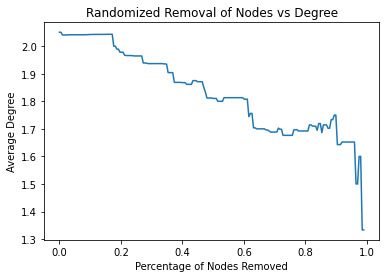

In [108]:
#plot results for randomised disruption

plt.plot(proportion_removed, degree_list_random)
plt.xlabel("Percentage of Nodes Removed")
plt.ylabel("Average Degree")
plt.title('Randomized Removal of Nodes vs Degree')

# Targeted Disruption

- Order nodes by degree
- Remove nodes outgoing edges one at a time
- Plot change in average degree

In [110]:
#sort nodes by degree for targeted disruption

sorted_degree_df =  all_degree.sort(col('degree').desc())
sorted_degree_df.show()

+--------------------+------+
|                  id|degree|
+--------------------+------+
|        3291556676.0|    19|
|        2406059855.0|    12|
|        3481965513.0|    10|
|         634330366.0|    10|
|         125128428.0|    10|
|        4521330855.0|     7|
|8.066952579161825...|     7|
|          46455464.0|     7|
|          19043568.0|     7|
|        3401254649.0|     6|
|         275276082.0|     6|
|         885960937.0|     6|
|        3947091915.0|     6|
|         851059680.0|     5|
|          98416337.0|     5|
|          81438841.0|     5|
|8.262089432611676...|     5|
|        1655766132.0|     5|
|        3247993823.0|     5|
|        4865974714.0|     5|
+--------------------+------+
only showing top 20 rows



In [111]:
#targeted disruption

temp_sorted = sorted_degree_df

degree_list_targeted = [average_degree.collect()[0].avg_degree]

nodes_removed_targeted = []

proportion_removed_targeted = [0]

for i in range(total_nodes):
  proportion_removed_targeted.append((i+1)/total_nodes)
  nodes_removed_targeted.append(temp_sorted.collect()[0].id)

  temp_sorted = spark.createDataFrame(temp_sorted.tail(temp_sorted.count()-1), temp_sorted.schema)
  temp_edge_df = edges_df.filter(~edges_df.src.isin(nodes_removed_targeted))

  g_temp = GraphFrame(temp_sorted, temp_edge_df)

  temp_degree = g_temp.degrees

  temp_avg_degree = temp_degree.select(avg("degree").alias('avg_degree'))

  degree_list_targeted.append(temp_avg_degree.collect()[0].avg_degree)
  print((i+1)/total_nodes)

print(proportion_removed_targeted)
print(degree_list_targeted)

0.005050505050505051
0.010101010101010102
0.015151515151515152
0.020202020202020204
0.025252525252525252
0.030303030303030304
0.03535353535353535
0.04040404040404041
0.045454545454545456
0.050505050505050504
0.05555555555555555
0.06060606060606061
0.06565656565656566
0.0707070707070707
0.07575757575757576
0.08080808080808081
0.08585858585858586
0.09090909090909091
0.09595959595959595
0.10101010101010101
0.10606060606060606
0.1111111111111111
0.11616161616161616
0.12121212121212122
0.12626262626262627
0.13131313131313133
0.13636363636363635
0.1414141414141414
0.14646464646464646
0.15151515151515152
0.15656565656565657
0.16161616161616163
0.16666666666666666
0.1717171717171717
0.17676767676767677
0.18181818181818182
0.18686868686868688
0.1919191919191919
0.19696969696969696
0.20202020202020202
0.20707070707070707
0.21212121212121213
0.21717171717171718
0.2222222222222222
0.22727272727272727
0.23232323232323232
0.23737373737373738
0.24242424242424243
0.2474747474747475
0.25252525252525254

Text(0.5, 1.0, 'Targeted Removal of Nodes vs Degree')

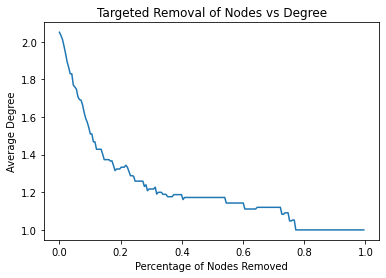

In [112]:
#plot results for targeted disruption

plt.plot(proportion_removed_targeted, degree_list_targeted)
plt.xlabel("Percentage of Nodes Removed")
plt.ylabel("Average Degree")
plt.title('Targeted Removal of Nodes vs Degree')

# Final Results

- Compare average degree plots of randomised and targeted disruption

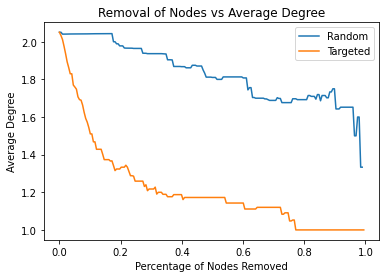

In [114]:
plt.plot(proportion_removed, degree_list_random, label = 'Random')
plt.plot(proportion_removed_targeted, degree_list_targeted, label = 'Targeted')
plt.xlabel("Percentage of Nodes Removed")
plt.ylabel("Average Degree")
plt.title('Removal of Nodes vs Average Degree')
plt.legend(loc="upper right")
plt.savefig(file_name_degree, format="pdf")